In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger



1) mpg: 연비

2) cylinders: 실린더 개수

3) displacement: 배기량

4) horsepower: 마력

5) weight: 무게

6) acceleration: 엔진이 초당 얻을 수 있는 가속력

7) model year: 출시 년도

8) origin: 제조 장소(1: 미국 USA, 2: 유럽 EU, 3: 일본 JPN)

9) car name: 자동차 이름

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# 결측치 확인
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
# 결측치 평균 값으로 대체
df['horsepower'].fillna(df['horsepower'].mean(), inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


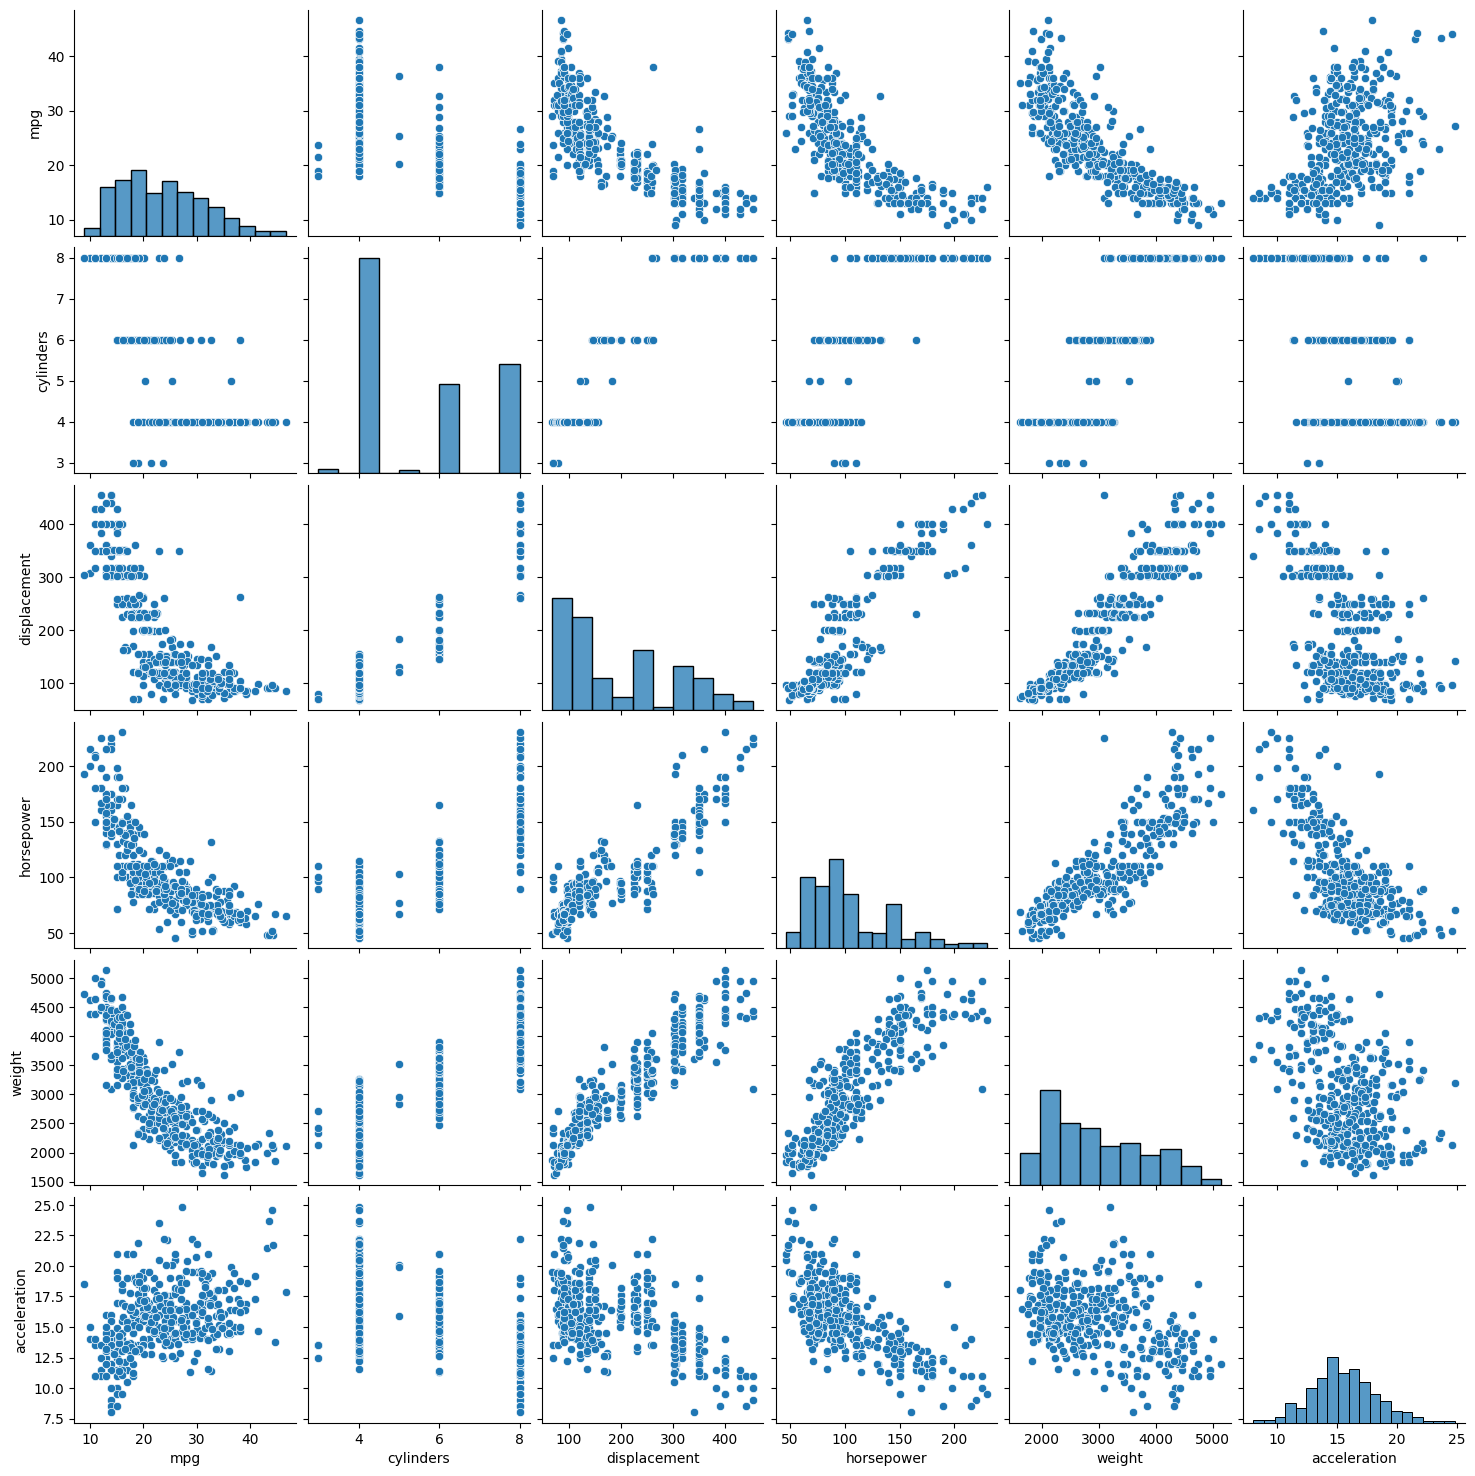

In [ ]:
# 변수 간의 산점도 행렬 - 수치 데이터
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])

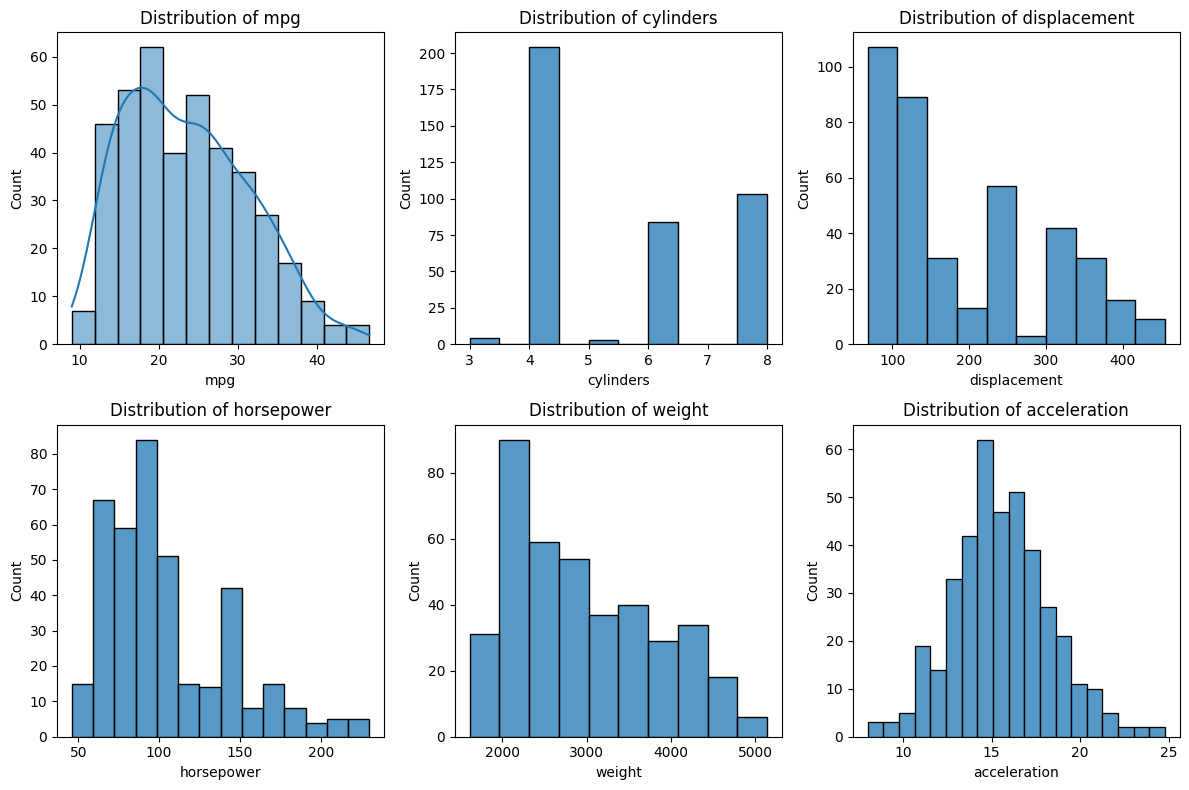

In [ ]:
# 변수의 분포 확인을 위한 히스토그램 그리기
# 변수들의 분포 형태, 이상치 등 확
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['mpg'], kde=True)
plt.title('Distribution of mpg')

plt.subplot(2, 3, 2)
sns.histplot(df['cylinders'])
plt.title('Distribution of cylinders')

plt.subplot(2, 3, 3)
sns.histplot(df['displacement'])
plt.title('Distribution of displacement')

plt.subplot(2, 3, 4)
sns.histplot(df['horsepower'])
plt.title('Distribution of horsepower')

plt.subplot(2, 3, 5)
sns.histplot(df['weight'])
plt.title('Distribution of weight')

plt.subplot(2, 3, 6)
sns.histplot(df['acceleration'])
plt.title('Distribution of acceleration')

plt.tight_layout()
plt.show()

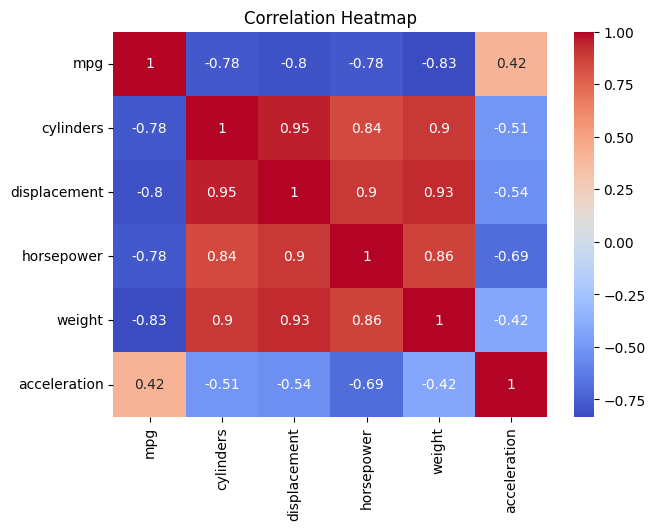

In [ ]:
# 변수들 간의 상관 관계를 확인하는 히트맵
# 각 변수들 간 상호작용 파악

plt.figure(figsize=(7, 5))
sns.heatmap(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

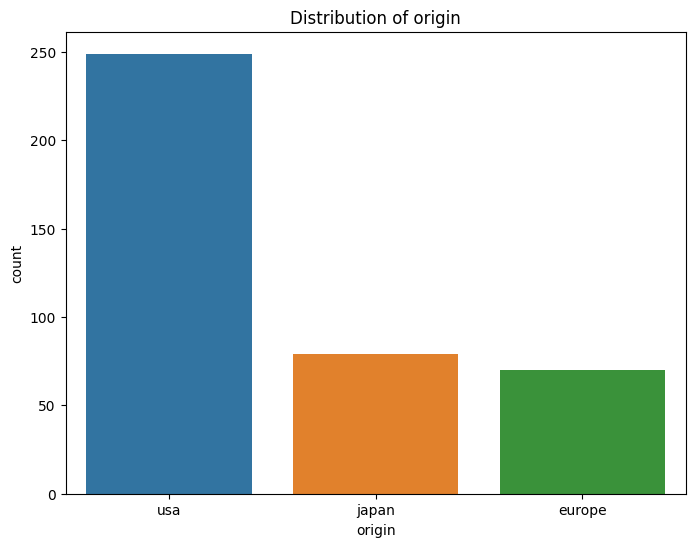

In [ ]:
# 범주형 데이터인 origin의 분포 확인

plt.figure(figsize=(8, 6))
sns.countplot(x='origin', data=df)
plt.title('Distribution of origin')
plt.show()

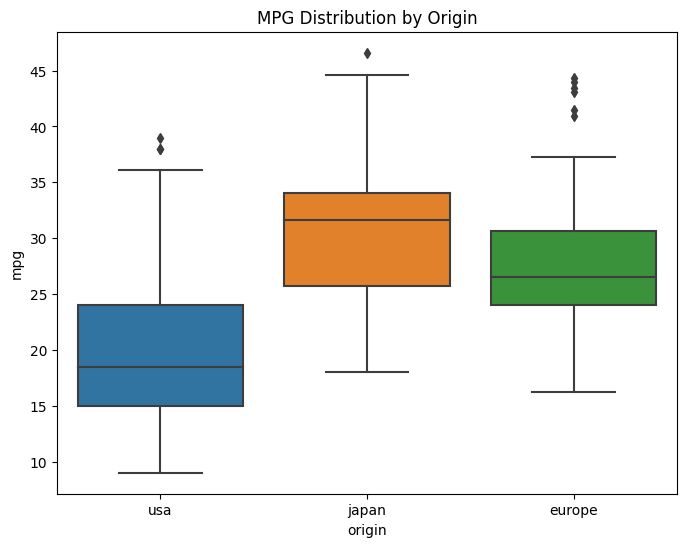

In [ ]:
# origin 변수에 따른 mpg의 분포

plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('MPG Distribution by Origin')
plt.show()

<ipython-input-26-571782d592db>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'model_year', y = 'mpg', hue = 'origin', data = df, ci = None);


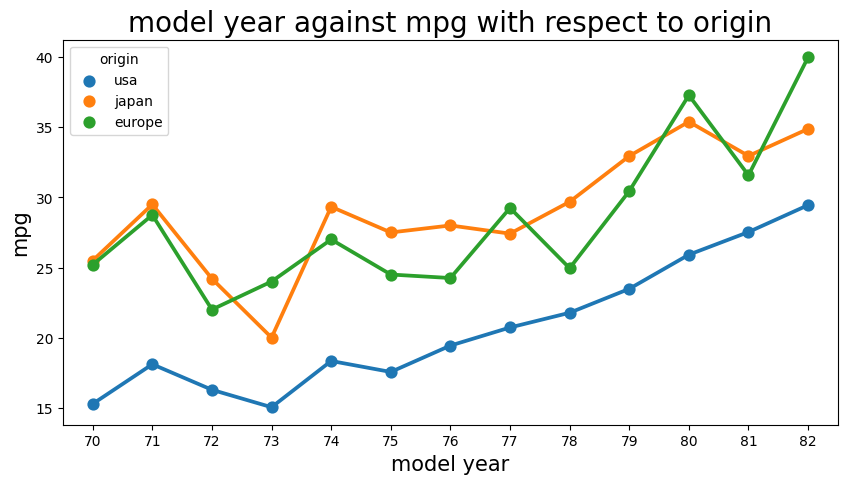

In [26]:
plt.figure(figsize=(10,5))
sns.pointplot(x = 'model_year', y = 'mpg', hue = 'origin', data = df, ci = None);
plt.title("model year against mpg with respect to origin", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

#데이터셋을 회귀로 풀어야 하는지 분류로 풀어야 하는지 결정하기 위해서는 목표와 변수 간의 관계를 분석해야 한다.
#mpg(연비)를 정답피쳐라고 생각해보았다. 그랬을 때 origin(제조 장소), car name(자동차 이름)은 범주형 변수이지만 정답데이터가 mpg(연비)인가를 확인하기 위해서는 크게 상관 없다 생각이 되어 수치형 변수로 변환하지 않았다. 히트맵을 그려본 결과 cylinders(실린더 개수), displacement(배기량), horsepower(마력) 등 이 mpg와 상관관계가 깊기 때문에 mpg(연비) 데이터를 예측데이터로 놓을 것이다.
#또한 EDA를 통해 변수들 간의 관계를 확인한 결과, 데이터셋이 회귀 분석을 위해 설계되었음을 알 수 있었습니다. 회귀 분석은 종속 변수(연비)를 예측하는 것이 목표입니다. 따라서 이 분석에서 예측 데이터는 주어진 모델을 사용하여 입력 변수를 기반으로 한 에측된 연비입니다.